In [2]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


# Base de données accidents corporels de la circulation
https://www.data.gouv.fr/fr/datasets/base-de-donnees-accidents-corporels-de-la-circulation/

Ce jeu de données provient d'un service public certifié
 NEC MERGITUR
Pour chaque accident corporel (soit un accident survenu sur une voie ouverte à la circulation publique, impliquant au moins un véhicule et ayant fait au moins une victime ayant nécessité des soins), des saisies d’information décrivant l’accident sont effectuées par l’unité des forces de l’ordre (police, gendarmerie, etc.) qui est intervenue sur le lieu de l’accident. Ces saisies sont rassemblées dans une fiche intitulée bulletin d’analyse des accidents corporels. L’ensemble de ces fiches constitue le fichier national des accidents corporels de la circulation dit " Fichier BAAC " administré par l’Observatoire national interministériel de la sécurité routière "ONISR".

Les bases de données, extraites du fichier BAAC, répertorient l'intégralité des accidents corporels de la circulation intervenus durant une année précise en France métropolitaine ainsi que les départements d’Outre-mer (Guadeloupe, Guyane, Martinique, La Réunion et Mayotte depuis 2012) avec une description simplifiée. Cela comprend des informations de localisation de l’accident, telles que renseignées ainsi que des informations concernant les caractéristiques de l’accident et son lieu, les véhicules impliqués et leurs victimes.

Par rapport aux bases de données agrégées 2005-2010 et 2006-2011 actuellement disponibles sur le site www.data.gouv.fr, les bases de données de 2005 à 2016 sont désormais annuelles et composées de 4 fichiers (Caractéristiques – Lieux – Véhicules – Usagers ) au format csv.

Ces bases occultent néanmoins certaines données spécifiques relatives aux usagers et aux véhicules et à leur comportement dans la mesure où la divulgation de ces données porterait atteinte à la protection de la vie privée des personnes physiques aisément identifiables ou ferait apparaître le comportement de telles personnes alors que la divulgation de ce comportement pourrait leur porter préjudice (avis de la CADA – 2 janvier 2012).

In [3]:
%matplotlib inline

In [4]:
import pandas as pd

# Téléchargement de la documentation
https://www.data.gouv.fr/fr/datasets/r/36496bab-a042-47bf-b08b-3c7467f2bddf

# Téléchargements des données
https://www.data.gouv.fr/fr/datasets/r/be2191a6-a7cd-446f-a9fc-8d698688eb9e

https://www.data.gouv.fr/fr/datasets/r/e4c6f4fe-7c68-4a1d-9bb6-b0f1f5d45526

https://www.data.gouv.fr/fr/datasets/r/08b77510-39c4-4761-bf02-19457264790f

https://www.data.gouv.fr/fr/datasets/r/96aadc9f-0b55-4e9a-a70e-c627ed97e6f7


In [5]:
path = "~/Downloads/caracteristiques_2016.csv"
caracteristiques_2016 = pd.read_csv(path, encoding="latin1")

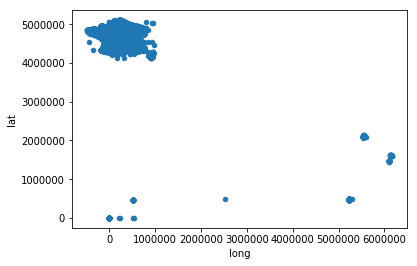

In [6]:
caracteristiques_2016.plot.scatter(x="long", y="lat")

In [7]:
caracteristiques_2016.columns

Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep'],
      dtype='object')

In [8]:
col_accident = "Num_Acc"

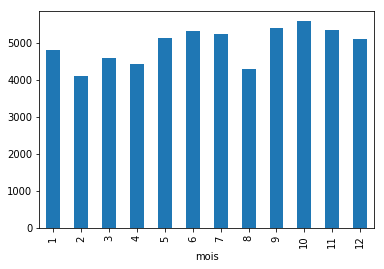

In [9]:
caracteristiques_2016.groupby("mois")[col_accident].count().plot.bar()

atm Conditions atmosphériques : 

Conditions atmosphériques : 1 – Normale

2 – Pluie légère

3 – Pluie forte

4 – Neige - grêle

5 – Brouillard - fumée 6 – Vent fort - tempête 7 – Temps éblouissant 8 – Temps couvert

9 – Autr


In [10]:
meteo = {1 : "Normale",
2 : "Pluie légère",
3 : "Pluie forte",
4 : "Neige - grêle",
5 : "Brouillard - fumée 6 – Vent fort - tempête 7 – Temps éblouissant 8 – Temps couvert",
9 : "Autr"}

In [11]:
caracteristiques_2016.atm = caracteristiques_2016.atm.map(meteo)

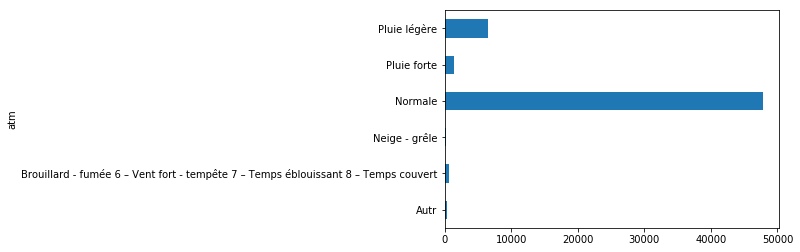

In [12]:
caracteristiques_2016.groupby("atm")[col_accident].count().plot.barh()

In [13]:
caracteristiques_2016.shape

(59432, 16)

In [14]:
!git add accidents_corporels_de_la_circulation.ipynb

In [15]:
!git commit -m "display nb d'accidens"

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


In [23]:
path = "~/Downloads/lieux_2016.csv"
lieux_2016 = pd.read_csv(path, encoding="latin1")

/Users/romain/anaconda3/envs/python360/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
lieux_2016

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201600000001,3,39,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000002,3,39,NaN,NaN,1.0,0.0,NaN,NaN,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0
2,201600000003,3,1,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0
3,201600000004,4,0,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
4,201600000005,4,0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
5,201600000006,3,41,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
6,201600000007,3,1,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,70.0,0.0,1.0,0.0,1.0,99.0
7,201600000008,3,2,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,1.0,0.0,70.0,1.0,0.0,1.0,0.0
8,201600000009,4,0,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,99.0
9,201600000010,4,0,NaN,A,2.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,44.0,7.0,0.0,1.0,0.0


In [17]:
path = "/Users/romain/Downloads/usagers_2016.csv"
usagers_2016 = pd.read_csv(path, encoding="latin1")

In [19]:
path = "/Users/romain/Downloads/vehicules_2016.csv"
vehicules_2016 = pd.read_csv(path, encoding="latin1")

In [20]:
vehicules_2016

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0,B02
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01
2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0,A01
3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0,A01
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02
5,201600000004,0.0,7,0,0.0,0.0,8.0,15.0,A01
6,201600000005,0.0,30,0,0.0,2.0,1.0,15.0,B02
7,201600000005,0.0,7,0,0.0,2.0,3.0,1.0,A01
8,201600000006,0.0,7,0,0.0,1.0,1.0,1.0,A01
9,201600000007,1.0,30,0,0.0,0.0,3.0,15.0,A01
